In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import statsmodels.api as sm
pd.set_option('display.max_columns', None)

Selected Features:
Recency
MntMeatProducts
MntWines
Income
MntGoldProds
Year_Birth
MntSweetProducts
MntFishProducts
MntFruits
NumWebVisitsMonth


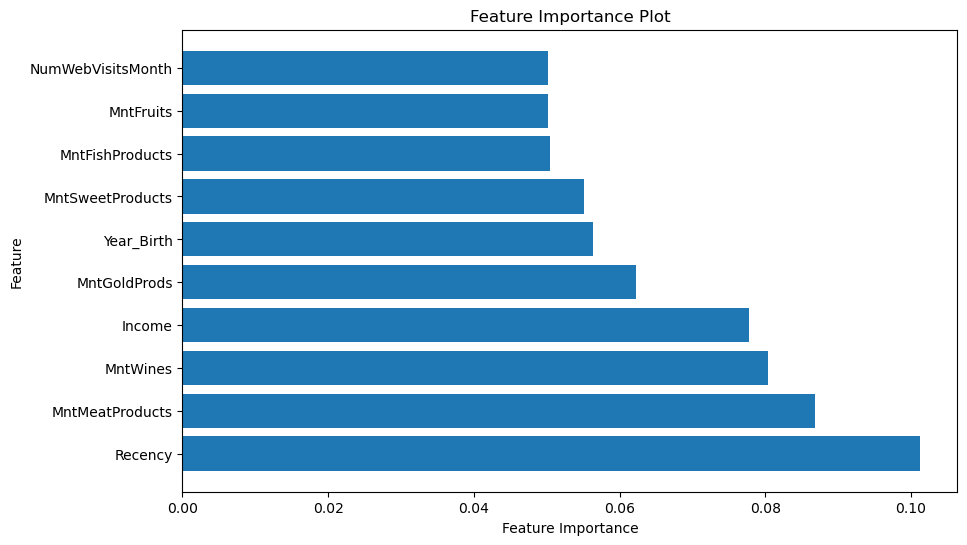

In [2]:

df = pd.read_excel("marketing_campaign1.xlsx")

# Drop non-numeric columns
numeric_df = df.drop(columns=['ID', 'Education', 'Marital_Status', 'Dt_Customer'])


numeric_df.fillna(0, inplace=True)


X = numeric_df.drop(columns=['Response'])
y = numeric_df['Response']


clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)


feature_importances = clf.feature_importances_

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Set a threshold for feature selection based on feature importance
threshold = 0.05


selected_features = X.columns[sorted_indices[feature_importances[sorted_indices] > threshold]]


print("Selected Features:")
for feature in selected_features:
    print(feature)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features)), feature_importances[sorted_indices][feature_importances[sorted_indices] > threshold], align='center')
plt.yticks(range(len(selected_features)), X.columns[sorted_indices][feature_importances[sorted_indices] > threshold])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [5]:
df.shape

(2240, 29)

## Feature Engineering

In [6]:
#Total  amount spendings on various items
df["total_amount_spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [7]:
df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   
5  2013-09-09       16       520         42               98                0   
6  2012-11-13       34       235         65              164               50   
7  2013-05-08       32        76         10               56                3   
8  2013-06-06       19        14          0               24                3   
9  2014-03-13       68        28          0                6                1   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   
5                42            14                  2                6   
6                49            27                  4                7   
7                 1            23                  2                4   
8                 3             2                  1                3   
9                 1            13                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   
5                    4                 10                  6             0   
6                    3                  7                  6             0   
7                    0                  4                  8             0   
8                    0                  2                  9             0   
9                    0                  0                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0        

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'total_amount_spent', 'Children'],
      dtype='object')

## EDA

In [9]:
to_drop = [ "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID" ,'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

df=df.drop(to_drop,axis=1)

In [10]:
#df1=df[['Recency','MntMeatProducts','MntWines','Income','MntGoldProds','Year_Birth','MntSweetProducts','MntFishProducts','MntFruits','NumWebVisitsMonth', 'Education', 'Marital_Status','Response']]
df.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0  Graduation         Single  58138.0        0         0       58   
1  Graduation         Single  46344.0        1         1       38   
2  Graduation       Together  71613.0        0         0       26   
3  Graduation       Together  26646.0        1         0       26   
4         PhD        Married  58293.0        1         0       94   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  total_amount_spent  Children  
0             0         0         1                1617         0  
1             0         0         0                  27         2  
2             0         0         0                 776         0  
3             0         0         0                  53         1  
4             0         0         0                 422         1

In [11]:
df.shape

(2240, 20)

In [12]:
df1=df.copy()
le = LabelEncoder()
for i in df1.columns:
    if df1[i].dtype == 'object':
        df1[i] = le.fit_transform(df[i])

df1.head(10)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0          2               4  58138.0        0         0       58   
1          2               4  46344.0        1         1       38   
2          2               5  71613.0        0         0       26   
3          2               5  26646.0        1         0       26   
4          4               3  58293.0        1         0       94   
5          3               5  62513.0        0         1       16   
6          2               2  55635.0        0         1       34   
7          4               3  33454.0        1         0       32   
8          4               5  30351.0        1         0       19   
9          4               5   5648.0        1         1       68   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   
5                  2                6                    4                 10   
6                  4                7                    3                  7   
7                  2                4                    0                  4   
8                  1                3                    0                  2   
9                  1                1                    0                  0   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   
5                  6             0             0             0             0   
6                  6             0             0             0             0   
7                  8             0             0             0             0   
8                  9             0             0             0             0   
9                 20             1             0             0             0   

   AcceptedCmp2  Complain  Response  total_amount_spent  Children  
0             0         0         1                1617         0  
1             0         0         0                  27         2  
2             0         0         0                 776         0  
3             0         0         0                  53         1  
4             0         0         0                 422         1  
5             0         0         0                 716         1  
6             0         0         0                 590         1  
7             0         0         0                 169         1  
8             0         0         1                  46         1  
9             0         0         0                  49         2

In [13]:
# checking data types of features
df1.dtypes

Education                int32
Marital_Status           int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
total_amount_spent       int64
Children                 int64
dtype: object

In [14]:
# checking null values and getting total amount of null values
df1.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
total_amount_spent      0
Children                0
dtype: int64

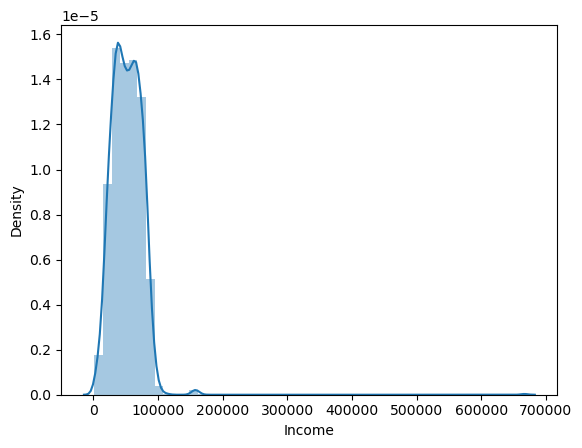

In [15]:
## plotting the Income column
sns.distplot(df1['Income'])
plt.show()

In [16]:
# dropping null values
df1.dropna(inplace=True)
df1.shape

(2216, 20)

In [17]:
## checking if any duplicates are present
df1.duplicated().any()
df1[df1.duplicated()]

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
83            3               5  38620.0        0         0       56   
179           0               3  78497.0        0         0       44   
281           2               5  51369.0        0         1       84   
282           2               5  37760.0        0         0       20   
363           4               3  37717.0        1         0       31   
...         ...             ...      ...      ...       ...      ...   
2218          2               5  22775.0        1         0       40   
2221          3               4  75777.0        0         0       12   
2225          2               5  58554.0        1         1       55   
2234          2               3  34421.0        1         0       81   
2236          4               5  64014.0        2         1       56   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
83                    1                2                    5   
179                   1                5                    7   
281                   2                8                    2   
282                   2                4                    1   
363                   1                1                    0   
...                 ...              ...                  ...   
2218                  1                1                    0   
2221                  1                3                    6   
2225                  6                8                    2   
2234                  1                1                    0   
2236                  7                8                    2   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
83                    3                  3             0             0   
179                  12                  2             0             0   
281                   4                  8             0             0   
282                   6                  7             0             0   
363                   2                  9             0             0   
...                 ...                ...           ...           ...   
2218                  2                  8             0             0   
2221                 11                  1             0             1   
2225                  6                  7             0             0   
2234                  2                  7             0             0   
2236                  5                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
83               0             0             0         0         0   
179              0             1             0         0         0   
281              0             0             0         0         0   
282              0             0             0         0         0   
363              0             0             0         0         0   
...            ...           ...           ...       ...       ...   
2218             0             0             0         0         0   
2221             1             0             0         0         1   
2225             0             0             0         0         0   
2234             0             0             0         0         0   
2236             0             1             0         0         0   

      total_amount_spent  Children  
83                   318         0  
179                  978         0  
281                  576         1  
282                  317         0  
363                   25         1  
...                  ...       ...  
2218                  15         1  
2221                1438         0  
2225                 586         2  
2234                  30         1  
2236                 444         3  

[182 rows x 20 columns]

In [18]:
## dropping duplicates
df1=df1.drop_duplicates().reset_index(drop=True)
df1[df1.duplicated()]
df1.shape

(2034, 20)

In [19]:
df1.dtypes

Education                int32
Marital_Status           int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
total_amount_spent       int64
Children                 int64
dtype: object

In [20]:
df1.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0          2               4  58138.0        0         0       58   
1          2               4  46344.0        1         1       38   
2          2               5  71613.0        0         0       26   
3          2               5  26646.0        1         0       26   
4          4               3  58293.0        1         0       94   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  total_amount_spent  Children  
0             0         0         1                1617         0  
1             0         0         0                  27         2  
2             0         0         0                 776         0  
3             0         0         0                  53         1  
4             0         0         0                 422         1

Income


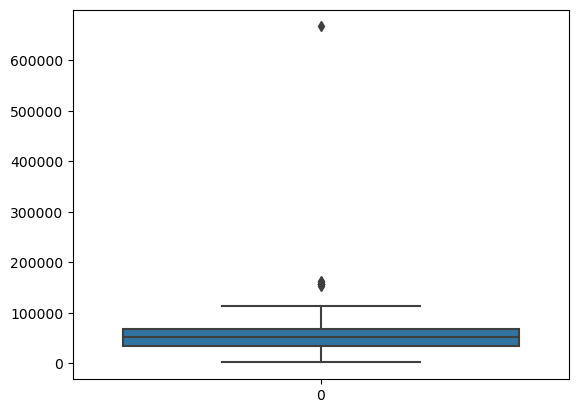

Kidhome


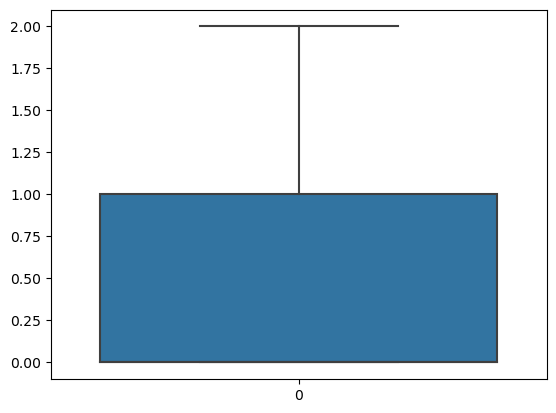

Teenhome


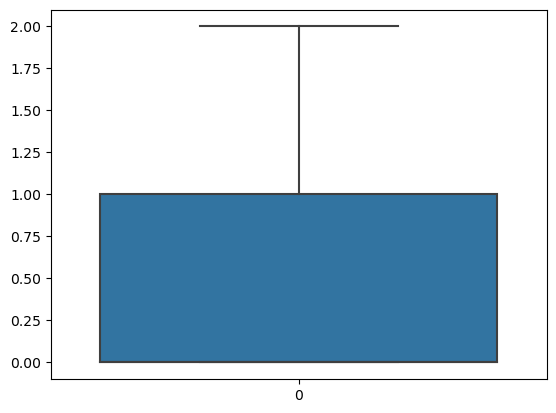

Recency


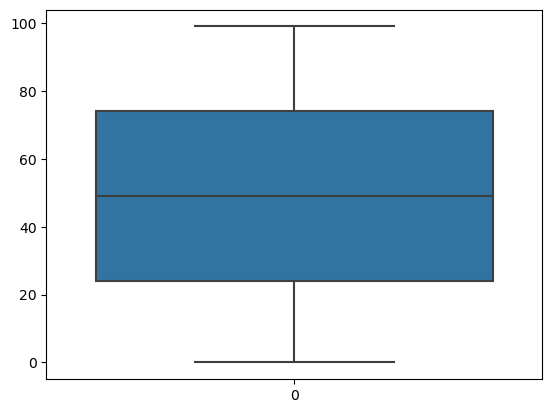

NumDealsPurchases


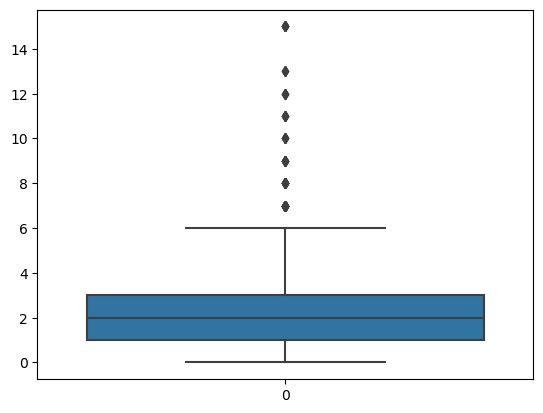

NumWebPurchases


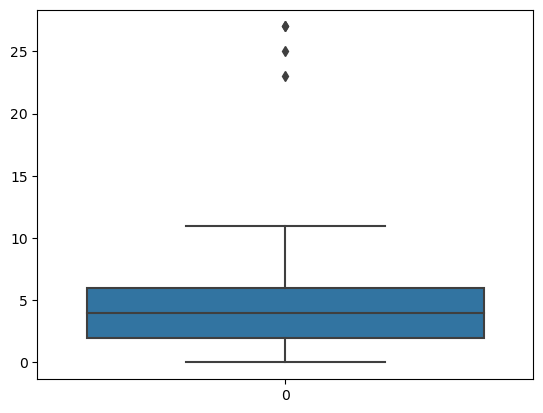

NumCatalogPurchases


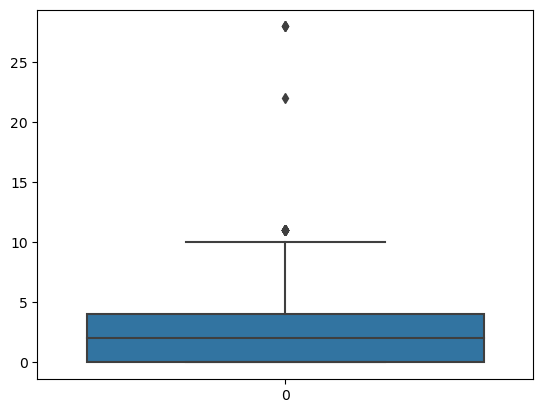

NumStorePurchases


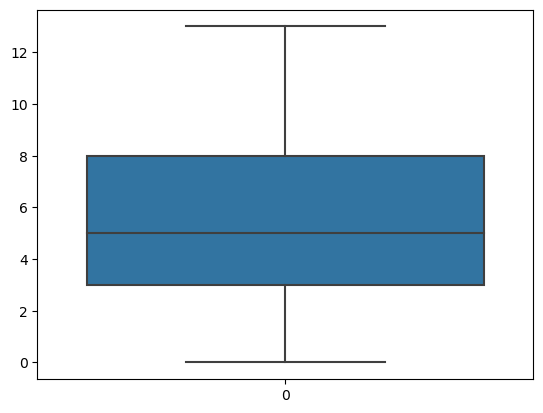

NumWebVisitsMonth


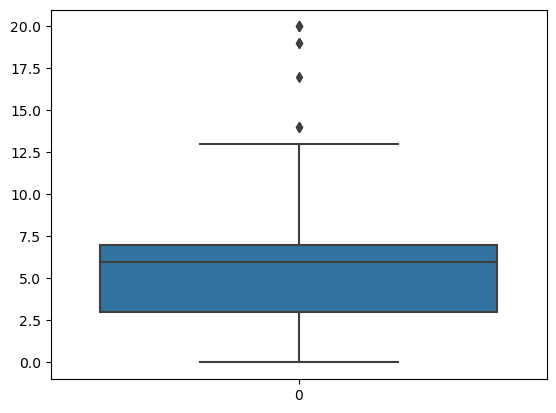

AcceptedCmp3


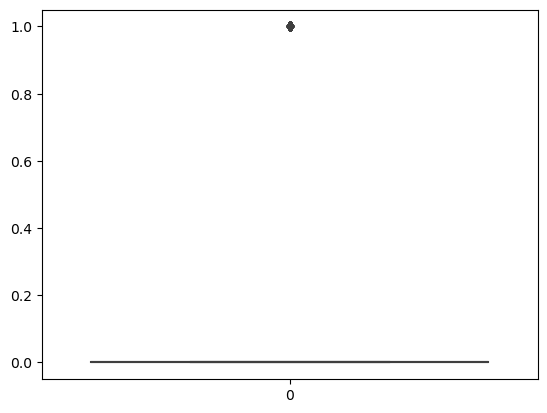

AcceptedCmp4


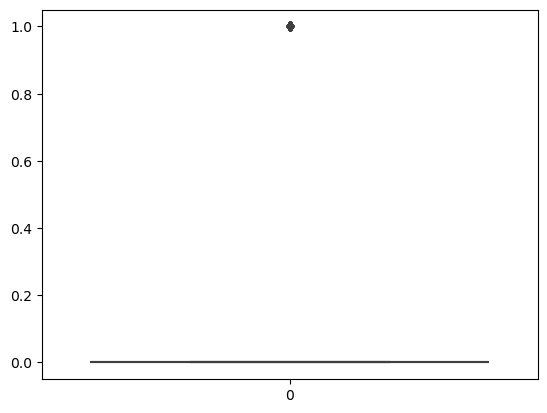

AcceptedCmp5


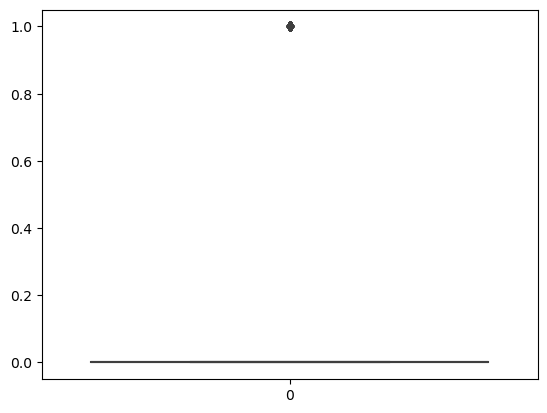

AcceptedCmp1


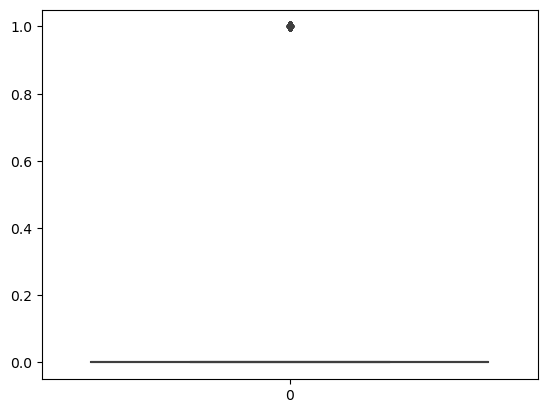

AcceptedCmp2


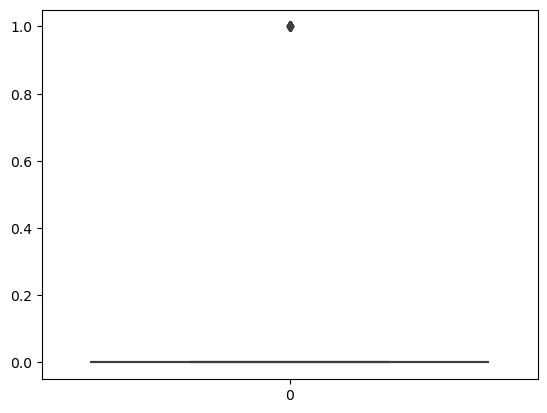

Complain


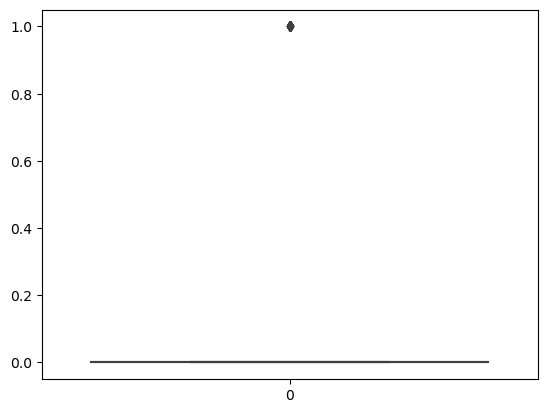

Response


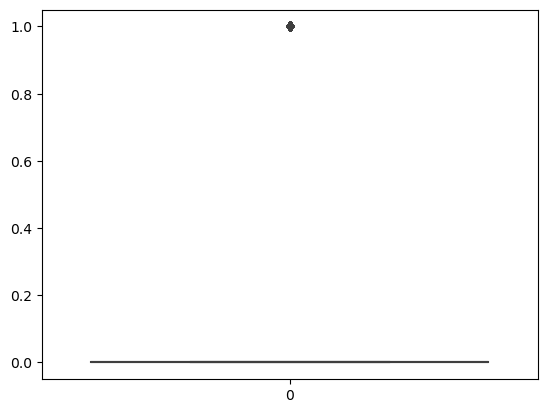

total_amount_spent


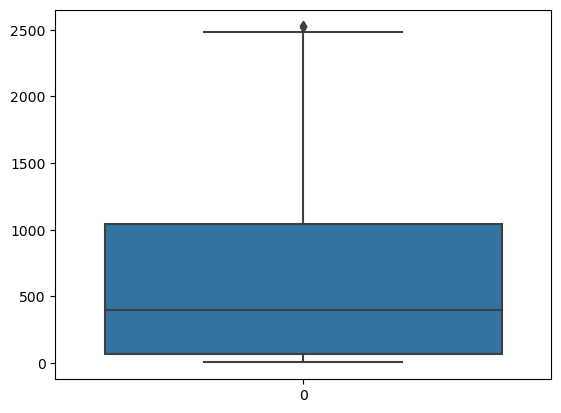

Children


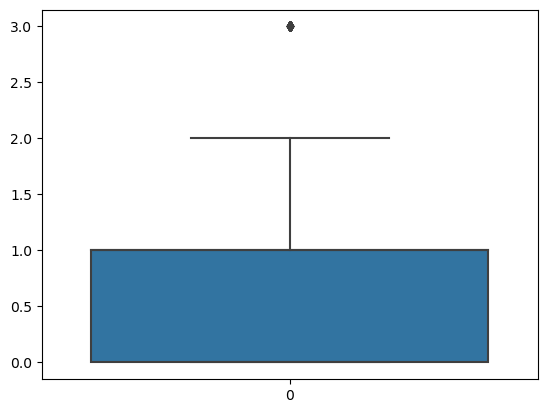

In [21]:
## Boxplot
for i in df.columns:
    if(df[i].dtype!='object'):
        print(i)
        sns.boxplot(df[i])
        plt.show()

In [22]:
# printing all the outliers
out=[]
def Zscore_outlier(df1):
    m = np.mean(df1)
    sd = np.std(df1)
    for i in df1:
        z = (i-m)/sd
        if np.abs(z) > 3:
            out.append(i)
    print("Outliers:",out)

for i in df1.columns:
    print(i)
    Zscore_outlier(df1[i])
    print('\n')

Education
Outliers: []


Marital_Status
Outliers: [0, 0, 7, 7]


Income
Outliers: [0, 0, 7, 7, 157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


Kidhome
Outliers: [0, 0, 7, 7, 157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


Teenhome
Outliers: [0, 0, 7, 7, 157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


Recency
Outliers: [0, 0, 7, 7, 157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


NumDealsPurchases
Outliers: [0, 0, 7, 7, 157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0, 15, 9, 15, 10, 9, 13, 9, 9, 15, 15, 15, 11, 12, 10, 15, 10, 11, 10, 13, 9, 12, 11, 9, 9, 13, 11, 15, 11, 10]


NumWebPurchases
Outliers: [0, 0, 7, 7, 157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0, 15, 9, 15, 10, 9, 13, 9, 9, 15, 15, 15, 11, 12, 10, 15, 10, 11, 10, 13, 9, 12, 11, 9, 9, 13, 11, 15, 11, 10, 23, 27, 25]


NumCatalo

In [23]:
## statiscal view of data
df1.describe().T

count          mean           std     min       25%  \
Education            2034.0      2.396755      1.127577     0.0      2.00   
Marital_Status       2034.0      3.716323      1.077270     0.0      3.00   
Income               2034.0  52357.791544  25526.956988  1730.0  35528.25   
Kidhome              2034.0      0.442970      0.535914     0.0      0.00   
Teenhome             2034.0      0.508358      0.546130     0.0      0.00   
Recency              2034.0     48.844641     28.983678     0.0     24.00   
NumDealsPurchases    2034.0      2.337758      1.933849     0.0      1.00   
NumWebPurchases      2034.0      4.099312      2.756911     0.0      2.00   
NumCatalogPurchases  2034.0      2.670600      2.937896     0.0      0.00   
NumStorePurchases    2034.0      5.782203      3.238853     0.0      3.00   
NumWebVisitsMonth    2034.0      5.322517      2.438665     0.0      3.00   
AcceptedCmp3         2034.0      0.074238      0.262222     0.0      0.00   
AcceptedCmp4         2034.0      0.076205      0.265390     0.0      0.00   
AcceptedCmp5         2034.0      0.072271      0.259000     0.0      0.00   
AcceptedCmp1         2034.0      0.065388      0.247271     0.0      0.00   
AcceptedCmp2         2034.0      0.012783      0.112363     0.0      0.00   
Complain             2034.0      0.009833      0.098696     0.0      0.00   
Response             2034.0      0.153392      0.360454     0.0      0.00   
total_amount_spent   2034.0    607.637168    603.552763     5.0     69.00   
Children             2034.0      0.951327      0.745599     0.0      0.00   

                         50%       75%       max  
Education                2.0      3.00       4.0  
Marital_Status           4.0      5.00       7.0  
Income               51533.0  68480.75  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
total_amount_spent     397.0   1048.00    2525.0  
Children                 1.0      1.00       3.0

In [24]:
df1.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'total_amount_spent',
       'Children'],
      dtype='object')

In [25]:
# finding IQR value
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Education                  1.0
Marital_Status             2.0
Income                 32952.5
Kidhome                    1.0
Teenhome                   1.0
Recency                   50.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        4.0
NumStorePurchases          5.0
NumWebVisitsMonth          4.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Response                   0.0
total_amount_spent       979.0
Children                   1.0
dtype: float64


In [26]:
df1.shape

(2034, 20)

In [34]:
# filtering(removal of outlier)
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(1212, 20)

In [35]:
df2.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1          2               4  46344.0        1         1       38   
2          2               5  71613.0        0         0       26   
3          2               5  26646.0        1         0       26   
4          4               3  58293.0        1         0       94   
5          3               5  62513.0        0         1       16   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   
5                  2                6                    4                 10   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   
5                  6             0             0             0             0   

   AcceptedCmp2  Complain  Response  total_amount_spent  Children  
1             0         0         0                  27         2  
2             0         0         0                 776         0  
3             0         0         0                  53         1  
4             0         0         0                 422         1  
5             0         0         0                 716         1

In [28]:
df2.describe().T

count          mean           std     min       25%  \
Education            1212.0      2.596535      0.873363     1.0      2.00   
Marital_Status       1212.0      3.701320      1.074391     0.0      3.00   
Income               1212.0  48387.150990  18842.366083  5305.0  33433.25   
Kidhome              1212.0      0.460396      0.522886     0.0      0.00   
Teenhome             1212.0      0.528878      0.528299     0.0      0.00   
Recency              1212.0     50.523927     28.497531     0.0     26.00   
NumDealsPurchases    1212.0      2.148515      1.335307     0.0      1.00   
NumWebPurchases      1212.0      3.712046      2.487376     0.0      2.00   
NumCatalogPurchases  1212.0      2.092409      2.410007     0.0      0.00   
NumStorePurchases    1212.0      5.586634      3.184902     0.0      3.00   
NumWebVisitsMonth    1212.0      5.322607      2.199553     0.0      4.00   
AcceptedCmp3         1212.0      0.000000      0.000000     0.0      0.00   
AcceptedCmp4         1212.0      0.000000      0.000000     0.0      0.00   
AcceptedCmp5         1212.0      0.000000      0.000000     0.0      0.00   
AcceptedCmp1         1212.0      0.000000      0.000000     0.0      0.00   
AcceptedCmp2         1212.0      0.000000      0.000000     0.0      0.00   
Complain             1212.0      0.000000      0.000000     0.0      0.00   
Response             1212.0      0.000000      0.000000     0.0      0.00   
total_amount_spent   1212.0    468.867162    502.050364     9.0     57.00   
Children             1212.0      0.989274      0.649500     0.0      1.00   

                         50%      75%      max  
Education                2.0      3.0      4.0  
Marital_Status           3.0      5.0      7.0  
Income               47581.5  64332.5  92859.0  
Kidhome                  0.0      1.0      2.0  
Teenhome                 1.0      1.0      2.0  
Recency                 51.0     75.0     99.0  
NumDealsPurchases        2.0      3.0      6.0  
NumWebPurchases          3.0      5.0     11.0  
NumCatalogPurchases      1.0      3.0     10.0  
NumStorePurchases        4.0      8.0     13.0  
NumWebVisitsMonth        6.0      7.0     13.0  
AcceptedCmp3             0.0      0.0      0.0  
AcceptedCmp4             0.0      0.0      0.0  
AcceptedCmp5             0.0      0.0      0.0  
AcceptedCmp1             0.0      0.0      0.0  
AcceptedCmp2             0.0      0.0      0.0  
Complain                 0.0      0.0      0.0  
Response                 0.0      0.0      0.0  
total_amount_spent     244.0    832.5   2440.0  
Children                 1.0      1.0      2.0

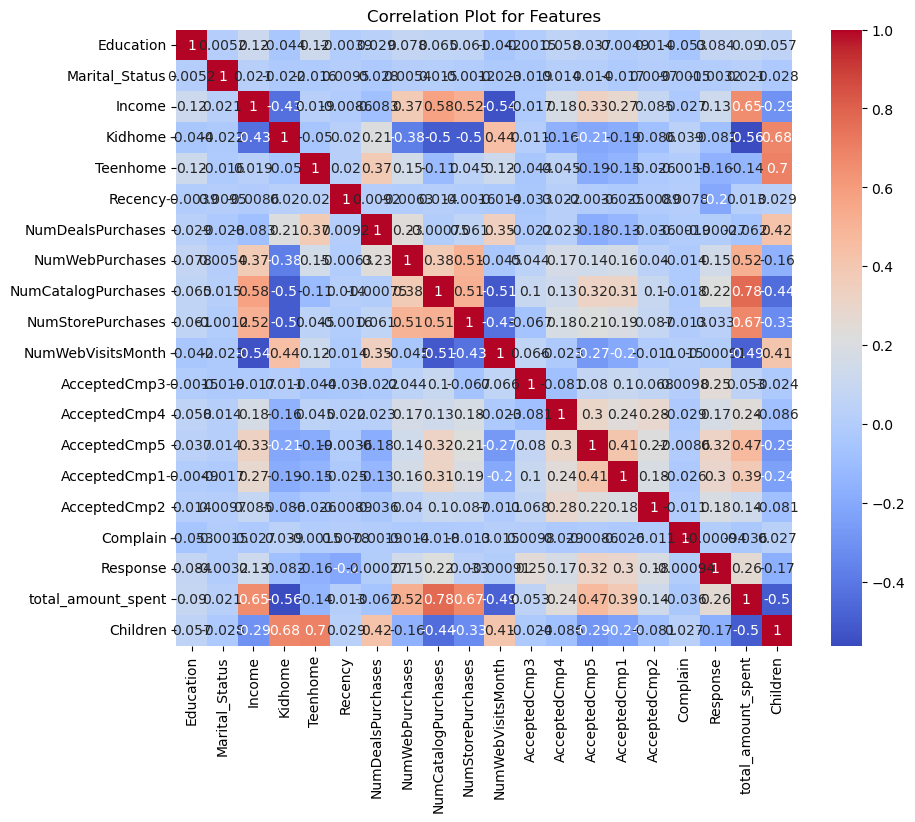

In [31]:
# Compute the correlation matrix
corr_matrix = df1.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Plot for Features')
plt.show()

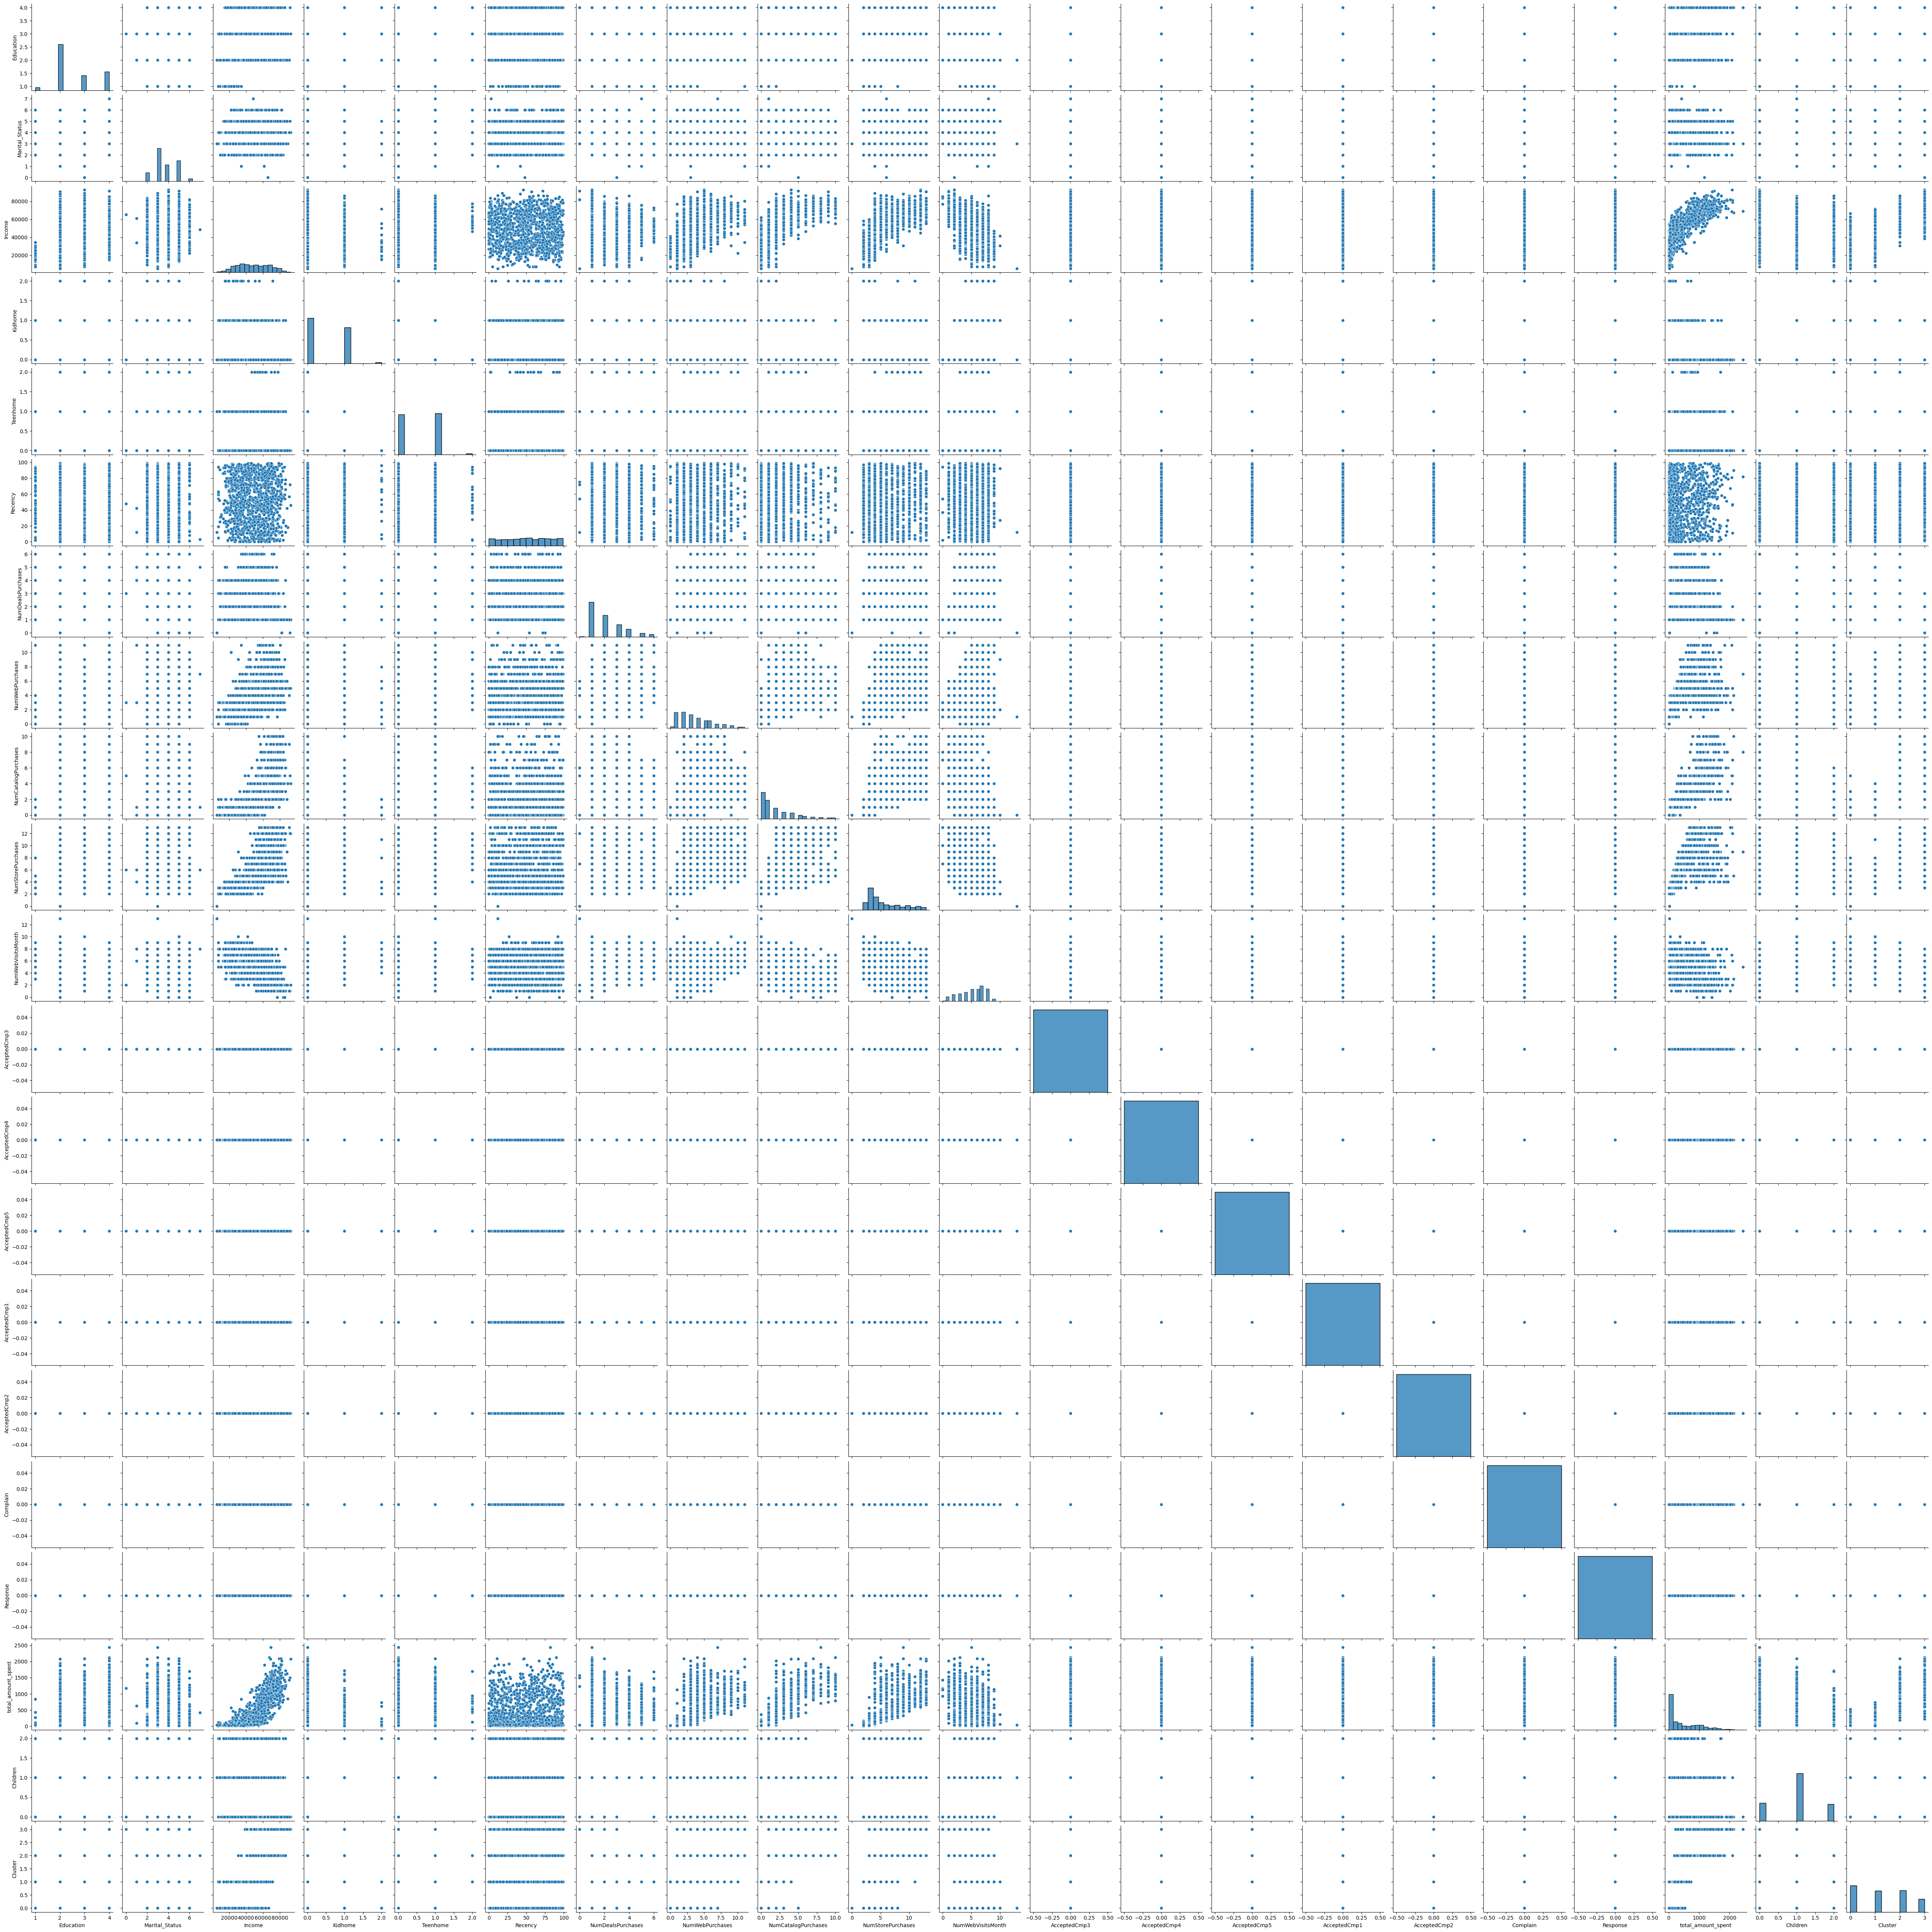

In [207]:
sns.pairplot(df2)
plt.show()

In [29]:
df2.shape

(1212, 20)

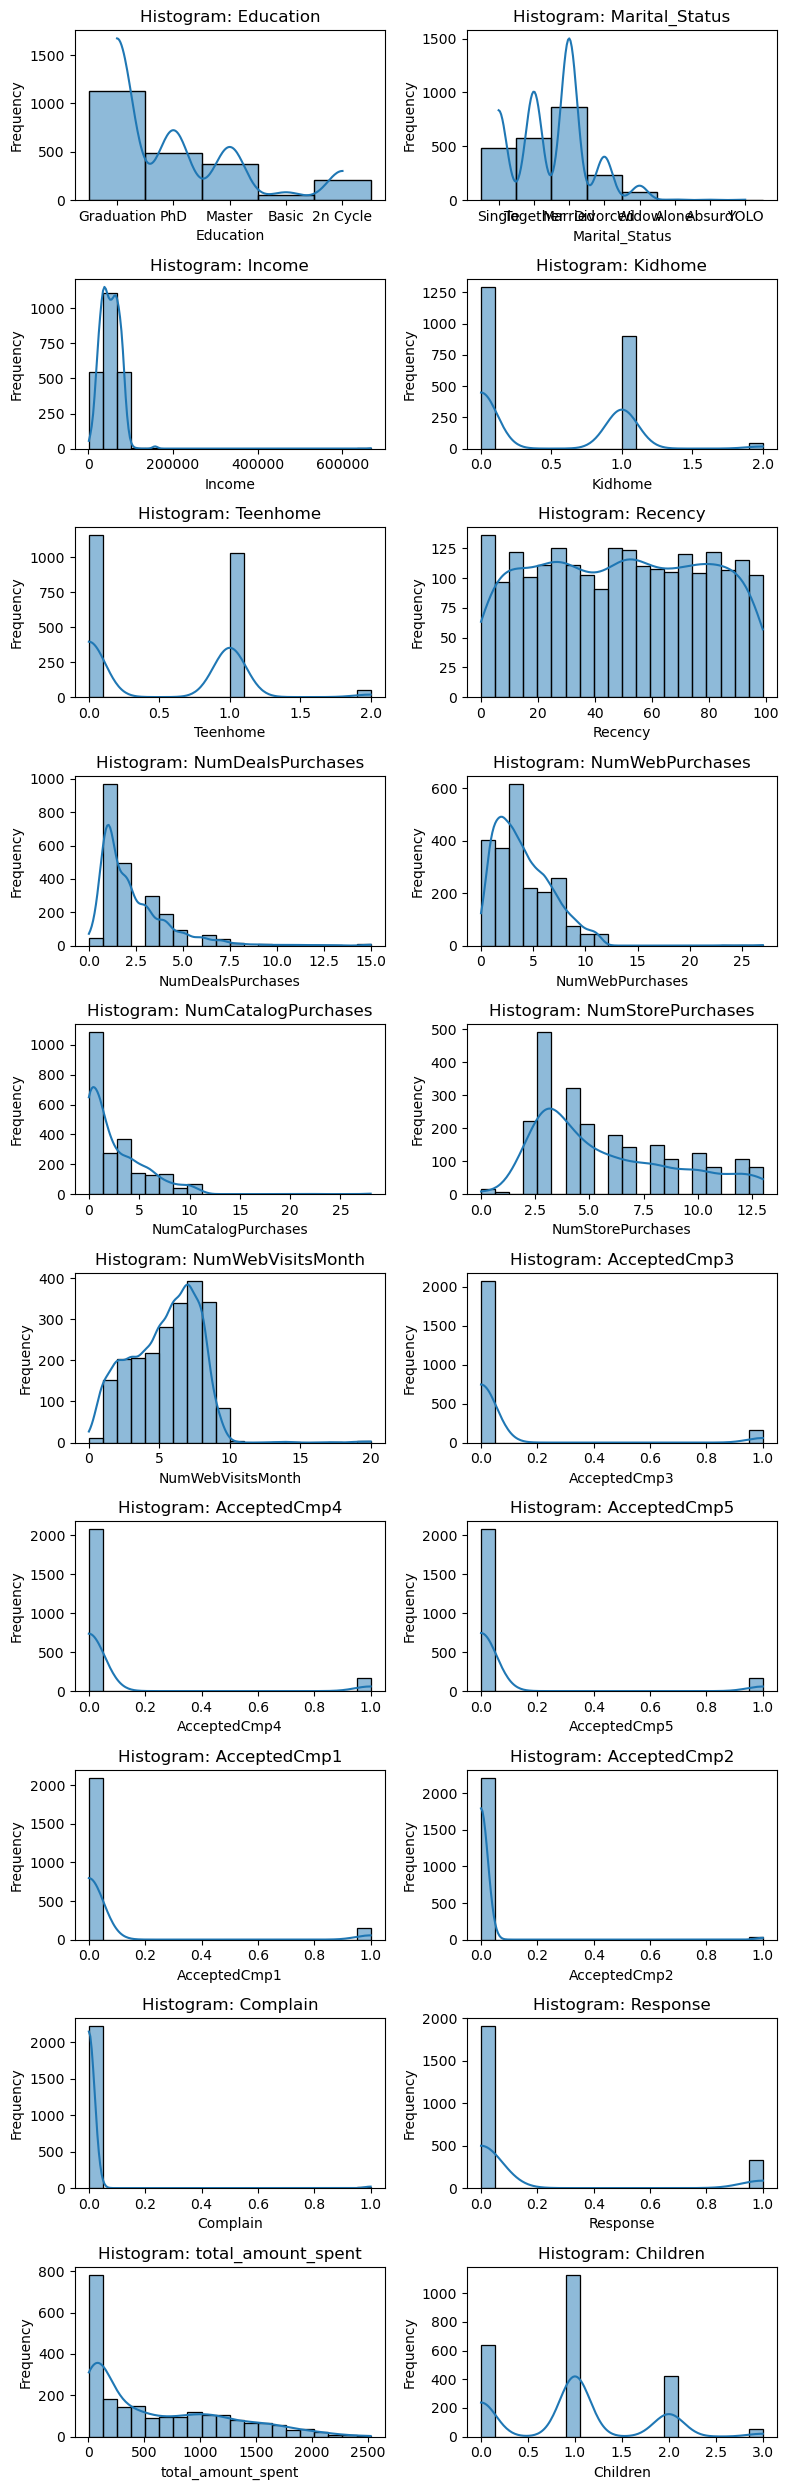

In [33]:
## Histogram

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(10, 2, figsize=(8, 25))

# Iterate through features and plot histograms
for i, feature in enumerate(df2.columns):
    row, col = divmod(i, 2)  # Calculate row and column indices
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram: {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

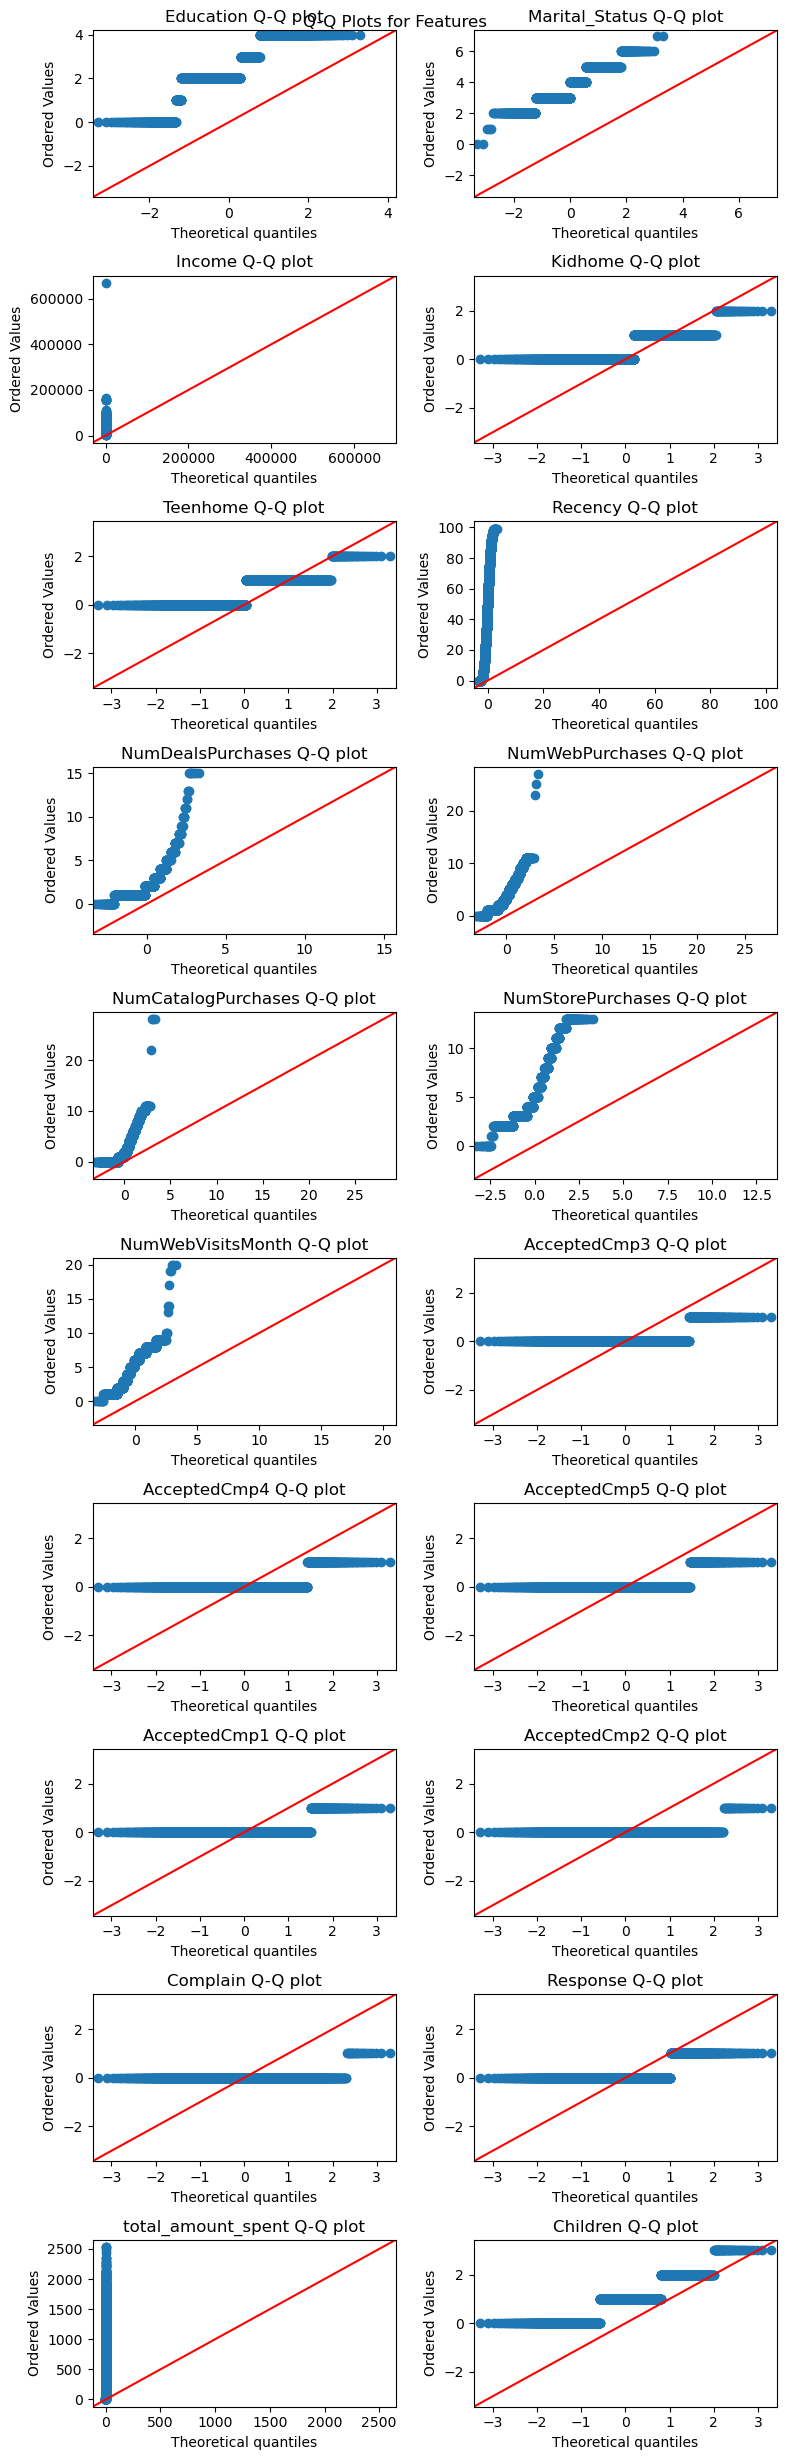

In [132]:
## Q-Q plot

# Create subplots
fig, axes = plt.subplots(10, 2, figsize=(8, 25))
fig.suptitle('Q-Q Plots for Features')

# Generate Q-Q plots for each feature
for i, feature in enumerate(df2.columns):
    row, col = divmod(i, 2)
    sm.qqplot(df1[feature], line='45', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Q-Q plot')
    axes[row, col].set_xlabel('Theoretical quantiles')
    axes[row, col].set_ylabel('Ordered Values')

plt.tight_layout()
plt.show()

In [30]:
df2.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'total_amount_spent',
       'Children'],
      dtype='object')

In [31]:
df3=df2.copy()
df3.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'],axis=1,inplace=True)
df3.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1          2               4  46344.0        1         1       38   
2          2               5  71613.0        0         0       26   
3          2               5  26646.0        1         0       26   
4          4               3  58293.0        1         0       94   
5          3               5  62513.0        0         1       16   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   
5                  2                6                    4                 10   

   NumWebVisitsMonth  total_amount_spent  Children  
1                  5                  27         2  
2                  4                 776         0  
3                  6                  53         1  
4                  5                 422         1  
5                  6                 716         1

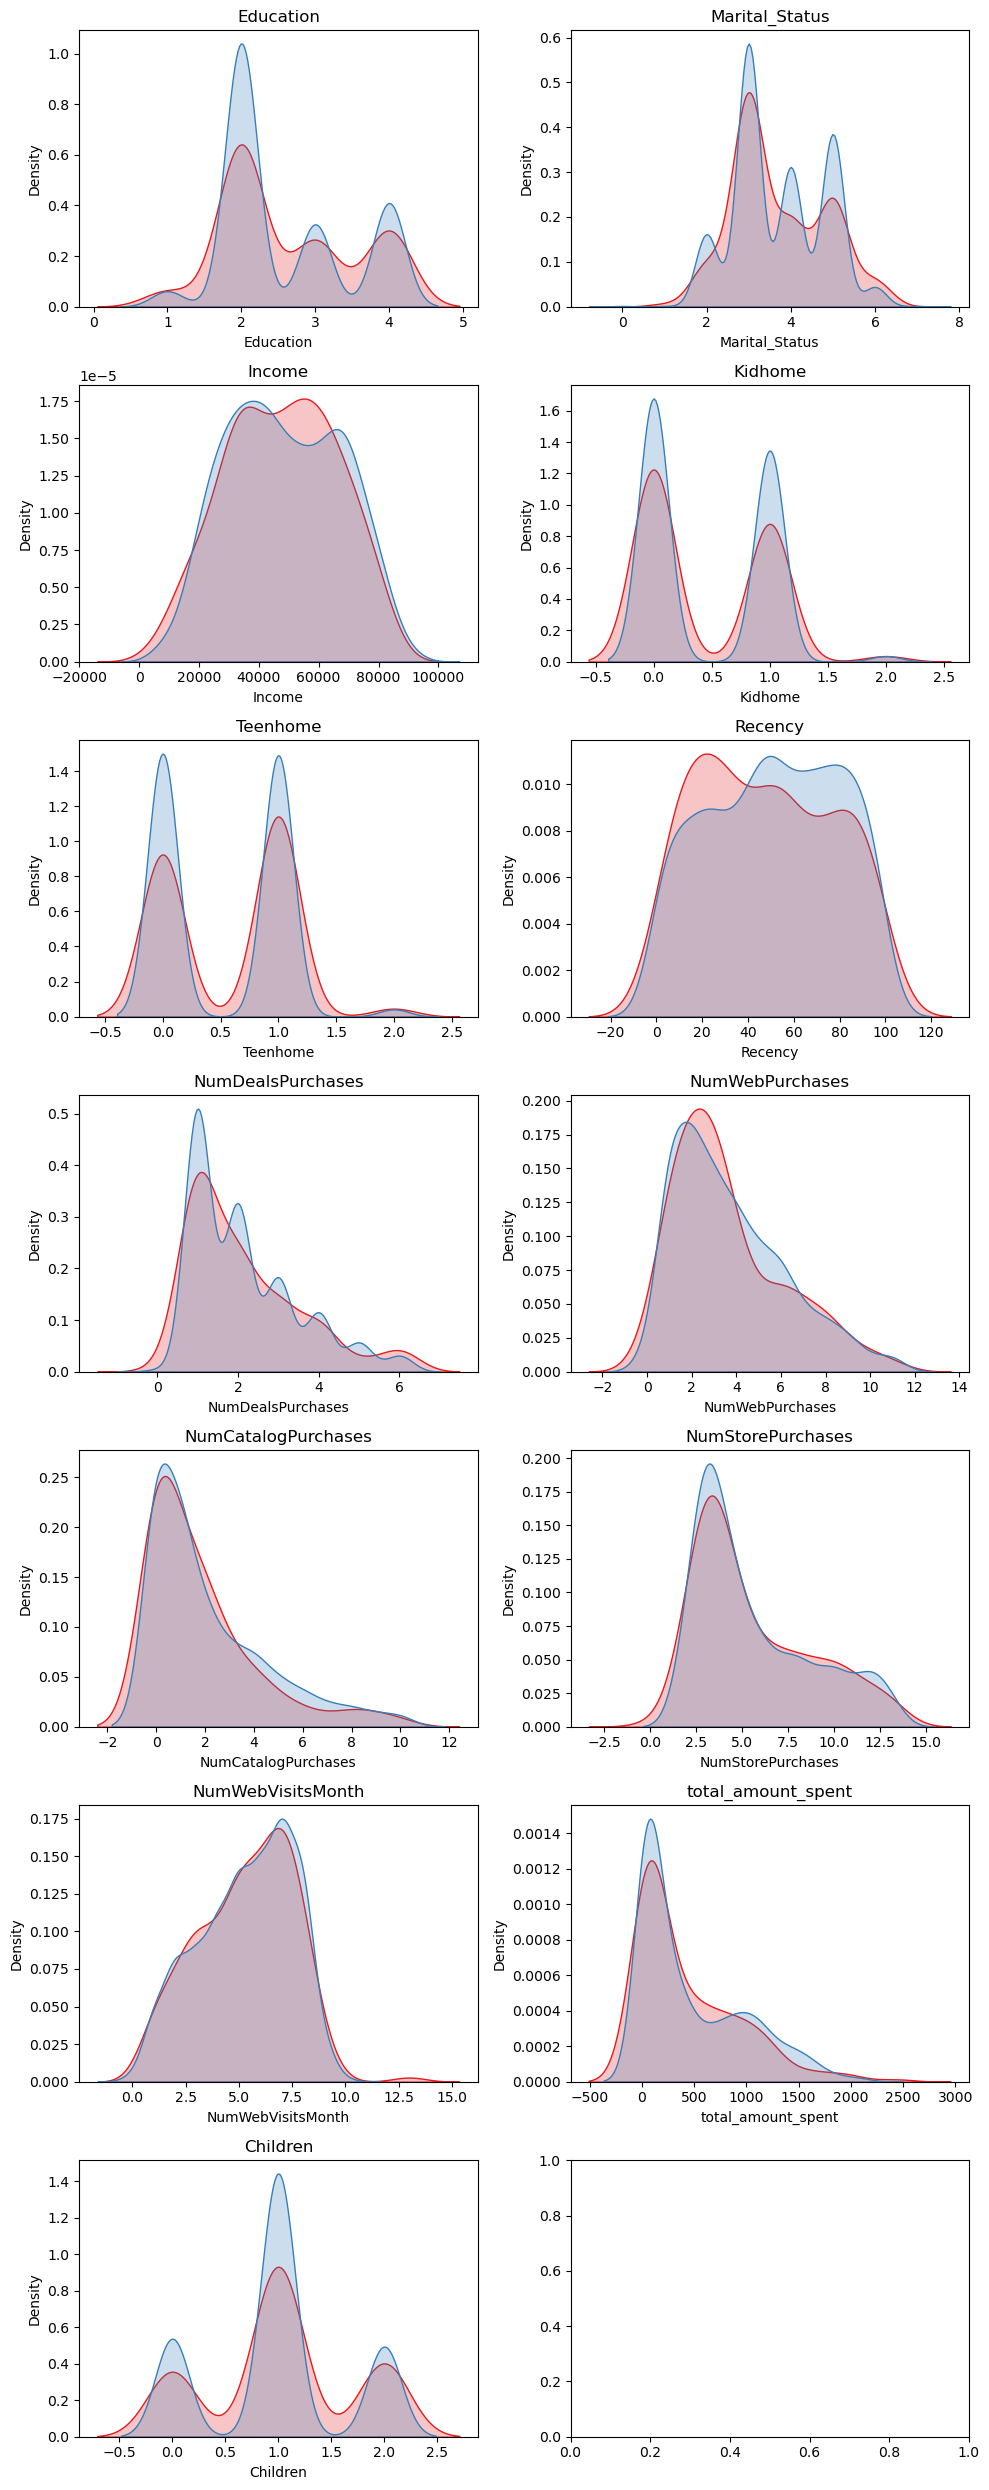

In [32]:
## kde plot

response_palette = sns.color_palette("Set1", n_colors=len(df['Response'].unique()))

num_features = len(df3.columns)
rows, cols = 7, 2
fig, axes = plt.subplots(rows, cols, figsize=(10, 25))

for i, feature in enumerate(df3.columns):
    row, col = divmod(i, cols)
    for idx, response_value in enumerate(df['Response'].unique()):
        sns.kdeplot(data=df3[df['Response'] == response_value], x=feature, fill=True, color=response_palette[idx], ax=axes[row, col], label=f'Response {response_value}')
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [28]:
mean = np.mean(df2,axis=0)
std_dev = np.std(df2,axis=0)

In [29]:
standardized = np.allclose(mean,0)and np.allclose(std_dev,0)
if standardized:
    print("The data is standardized.")
else:
    print("The data is not standardized.")

The data is not standardized.


In [30]:
#data is not standardized we have to do data normal distribution and then PCA...
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)
#Data Transformed
X_scaled

array([[-0.68331387,  0.27811387, -0.10847865, ...,  0.        ,
        -0.88048848,  1.55680275],
       [-0.68331387,  1.20925753,  1.23314856, ...,  0.        ,
         0.61200956, -1.52376041],
       [-0.68331387,  1.20925753, -1.1543203 , ...,  0.        ,
        -0.82867947,  0.01652117],
       ...,
       [-0.68331387,  0.27811387, -1.14529435, ...,  0.        ,
        -0.89045175, -1.52376041],
       [-0.68331387, -0.6530298 ,  0.68150399, ...,  0.        ,
         1.73785922,  0.01652117],
       [ 0.46215834,  1.20925753,  1.10742244, ...,  0.        ,
         0.74551739,  0.01652117]])

Education  Marital_Status        Income      Kidhome     Teenhome  \
count  1212.000000     1212.000000   1212.000000  1212.000000  1212.000000   
mean      2.596535        3.701320  48387.150990     0.460396     0.528878   
std       0.873363        1.074391  18842.366083     0.522886     0.528299   
min       1.000000        0.000000   5305.000000     0.000000     0.000000   
25%       2.000000        3.000000  33433.250000     0.000000     0.000000   
50%       2.000000        3.000000  47581.500000     0.000000     1.000000   
75%       3.000000        5.000000  64332.500000     1.000000     1.000000   
max       4.000000        7.000000  92859.000000     2.000000     2.000000   

           Recency  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count  1212.000000        1212.000000      1212.000000          1212.000000   
mean     50.523927           2.148515         3.712046             2.092409   
std      28.497531           1.335307         2.487376             2.410007   
min       0.000000           0.000000         0.000000             0.000000   
25%      26.000000           1.000000         2.000000             0.000000   
50%      51.000000           2.000000         3.000000             1.000000   
75%      75.000000           3.000000         5.000000             3.000000   
max      99.000000           6.000000        11.000000            10.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        1212.000000        1212.000000        1212.0        1212.0   
mean            5.586634           5.322607           0.0           0.0   
std             3.184902           2.199553           0.0           0.0   
min             0.000000           0.000000           0.0           0.0   
25%             3.000000           4.000000           0.0           0.0   
50%             4.000000           6.000000           0.0           0.0   
75%             8.000000           7.000000           0.0           0.0   
max            13.000000          13.000000           0.0           0.0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
count        1212.0        1212.0        1212.0    1212.0    1212.0   
mean            0.0           0.0           0.0       0.0       0.0   
std             0.0           0.0           0.0       0.0       0.0   
min             0.0           0.0           0.0       0.0       0.0   
25%             0.0           0.0           0.0       0.0       0.0   
50%             0.0           0.0           0.0       0.0       0.0   
75%             0.0           0.0           0.0       0.0       0.0   
max             0.0           0.0           0.0       0.0       0.0   

       total_amount_spent     Children  
count         1212.000000  1212.000000  
mean           468.867162     0.989274  
std            502.050364     0.649500  
min              9.000000     0.000000  
25%             57.000000     1.000000  
50%            244.000000     1.000000  
75%            832.500000     1.000000  
max           2440.000000     2.000000

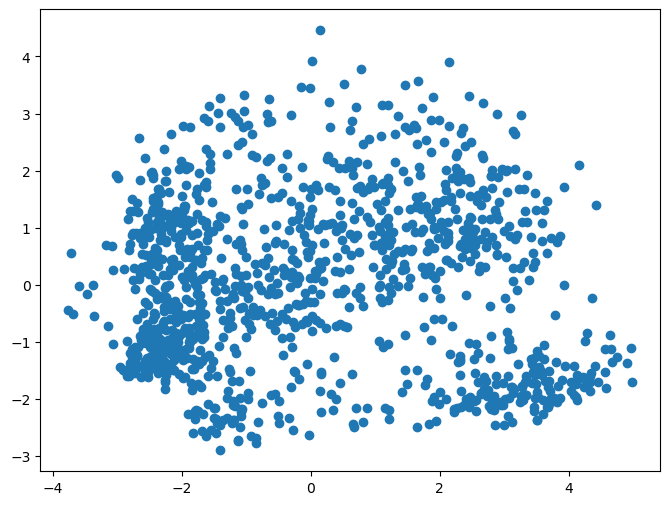

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_scaled.shape
X_pca.shape
X_pca
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],)
df2.describe()

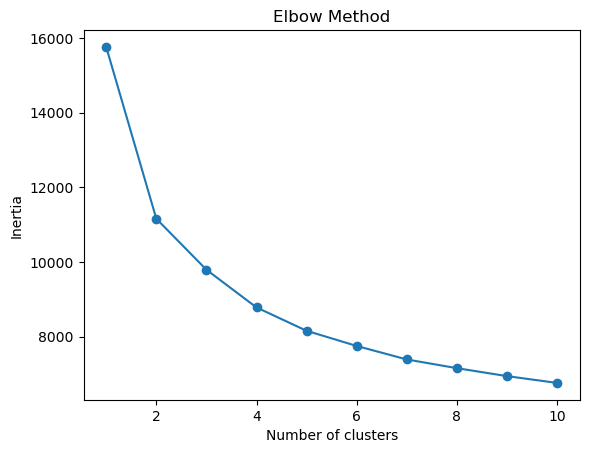

Cluster
0    389
2    319
1    314
3    190
Name: count, dtype: int64
Cluster centroids:
 [[-1.72611478 -1.11870844]
 [-1.55395848  1.07315541]
 [ 1.81209868  1.2861411 ]
 [ 3.05969544 -1.64248541]]


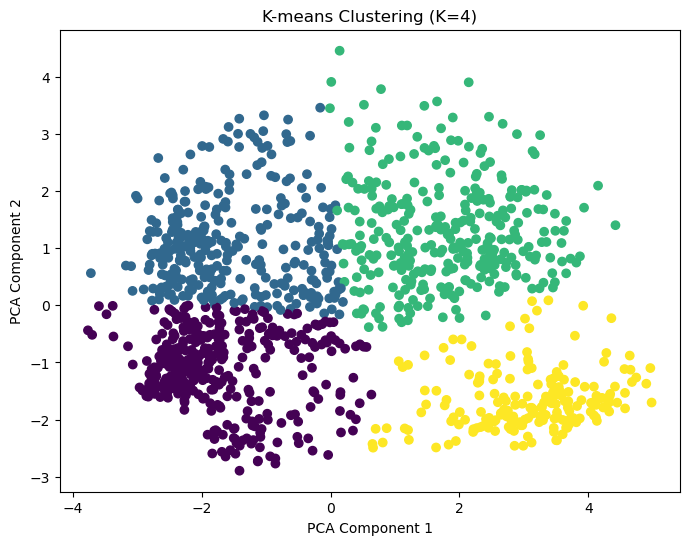

In [32]:
# Importing necessary libraries
from sklearn.cluster import KMeans


# Assuming X_pca is the reduced dimensional data after PCA

# Choosing the number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# From the elbow method graph, choose the optimal number of clusters
# Let's assume the optimal number of clusters is 3
k = 4

# Applying KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Adding the cluster labels to the DataFrame
df2['Cluster'] = clusters

# Printing the count of data points in each cluster
print(df2['Cluster'].value_counts())

# You can further analyze the clusters by checking the cluster centroids and interpreting them.
# For example, you can get the cluster centroids using:
centroids = kmeans.cluster_centers_
print("Cluster centroids:\n", centroids)

# Visualizing the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (K=4)')
plt.show()

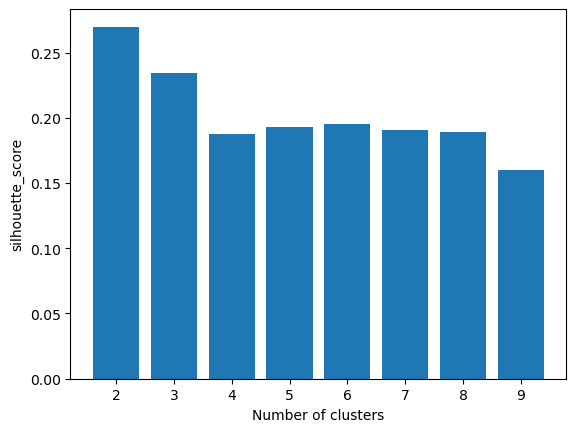

In [33]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, m1.fit_predict(X_scaled)))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

         Education  Marital_Status        Income   Kidhome  Teenhome  \
Cluster                                                                
0         2.393316        3.724936  31292.231362  0.691517  0.133676   
1         2.687898        3.636943  41072.232484  0.818471  0.853503   
2         2.721003        3.655172  62649.548589  0.090909  0.993730   
3         2.652632        3.836842  71529.800000  0.015789  0.021053   

           Recency  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                                       
0        50.151671           1.503856         1.912596             0.419023   
1        50.707006           2.866242         3.003185             0.722930   
2        49.862069           2.868339         6.175549             3.605016   
3        52.094737           1.073684         4.431579             5.242105   

         NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
Cluster        

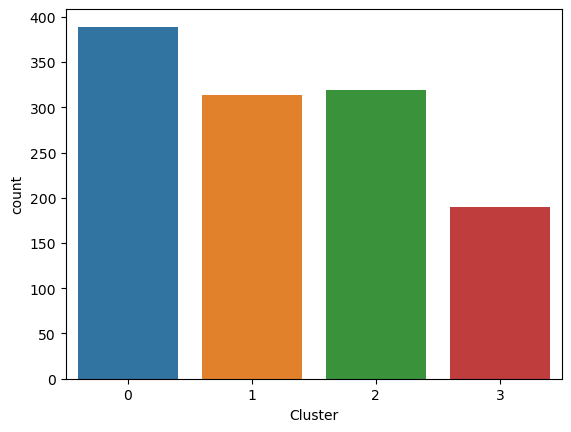

In [39]:
# Analyzing the characteristics of each cluster
K_cluster_means = df2.groupby('Cluster').mean()
print(K_cluster_means)



## countplot of each clusters
sns.countplot(x=df2['Cluster'])
plt.show()

### Model Building for Kmeans clustering

In [40]:
X=pd.DataFrame(X_pca)
y=df2['Cluster']
X

0         1
0    -2.028298  0.609986
1     2.584627 -1.195561
2    -2.057275 -1.003565
3     0.216055  1.056366
4     1.901780  0.986742
...        ...       ...
1207 -3.378934 -0.008799
1208  2.408617 -0.177596
1209 -1.125462 -2.719481
1210  1.909774  1.016560
1211  2.729360  0.752802

[1212 rows x 2 columns]

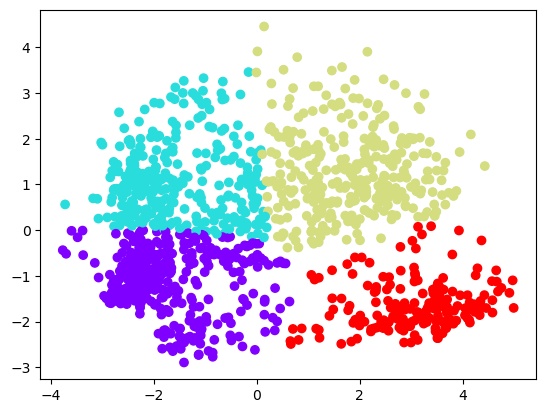

In [41]:
# Scatter plot for 1st two cols
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.show()

In [42]:
## Doing train test split(pca data and cluster as target variable)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=100)
print(X_train.shape)
X_test.shape

(909, 2)


(303, 2)

In [45]:
## Logistic regression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
Lr=LogisticRegressionCV()
Lr.fit(X_train,y_train)
y_train_pred = Lr.predict(X_train)
y_test_pred = Lr.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9988998899889989
Test accuracy: 0.9966996699669967


In [46]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.9735973597359736


In [47]:
## Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
Rfc = DecisionTreeClassifier()
Rfc.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = Rfc.predict(X_train)
y_test_pred = Rfc.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.9735973597359736


In [48]:
## SVM classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9867986798679867
Test accuracy: 0.9801980198019802


In [49]:
## Naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nv_model = GaussianNB()
nv_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = nv_model.predict(X_train)
y_test_pred = nv_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9834983498349835
Test accuracy: 0.9801980198019802


#### conclusion
Random forest gives good accuracy in kmeans clustering

## Agglomerative Clustering 

In [50]:
df4=df2.copy()
df4.drop('Cluster',axis=1,inplace=True)
df4.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1          2               4  46344.0        1         1       38   
2          2               5  71613.0        0         0       26   
3          2               5  26646.0        1         0       26   
4          4               3  58293.0        1         0       94   
5          3               5  62513.0        0         1       16   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   
5                  2                6                    4                 10   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   
5                  6             0             0             0             0   

   AcceptedCmp2  Complain  Response  total_amount_spent  Children  
1             0         0         0                  27         2  
2             0         0         0                 776         0  
3             0         0         0                  53         1  
4             0         0         0                 422         1  
5             0         0         0                 716         1

In [51]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
agglomerative_cluster = AgglomerativeClustering(n_clusters=4)
cluster = agglomerative_cluster.fit_predict(X_scaled)
# Add cluster labels to the original dataset
df4['Agglomerative Cluster'] = cluster
df4.head(8)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1           2               4  46344.0        1         1       38   
2           2               5  71613.0        0         0       26   
3           2               5  26646.0        1         0       26   
4           4               3  58293.0        1         0       94   
5           3               5  62513.0        0         1       16   
6           2               2  55635.0        0         1       34   
7           4               3  33454.0        1         0       32   
10          1               3   7500.0        0         0       59   

    NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1                   2                1                    1   
2                   1                8                    2   
3                   2                2                    0   
4                   5                5                    3   
5                   2                6                    4   
6                   4                7                    3   
7                   2                4                    0   
10                  1                2                    0   

    NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1                   2                  5             0             0   
2                  10                  4             0             0   
3                   4                  6             0             0   
4                   6                  5             0             0   
5                  10                  6             0             0   
6                   7                  6             0             0   
7                   4                  8             0             0   
10                  3                  8             0             0   

    AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
1              0             0             0         0         0   
2              0             0             0         0         0   
3              0             0             0         0         0   
4              0             0             0         0         0   
5              0             0             0         0         0   
6              0             0             0         0         0   
7              0             0             0         0         0   
10             0             0             0         0         0   

    total_amount_spent  Children  Agglomerative Cluster  
1                   27         2                      1  
2                  776         0                      2  
3                   53         1                      0  
4                  422         1                      1  
5                  716         1                      3  
6                  590         1                      3  
7                  169         1                      0  
10                  61         0                      0

                       Education  Marital_Status        Income   Kidhome  \
Agglomerative Cluster                                                      
0                       2.463203        3.705628  32932.945887  0.623377   
1                       2.684411        3.688213  44285.079848  1.007605   
2                       2.727848        3.822785  73714.158228  0.012658   
3                       2.650456        3.647416  61204.841945  0.009119   

                       Teenhome    Recency  NumDealsPurchases  \
Agglomerative Cluster                                           
0                      0.201299  51.850649           1.636364   
1                      0.817490  51.307985           2.939163   
2                      0.000000  51.702532           1.044304   
3                      1.012158  47.468085           2.765957   

                       NumWebPurchases  NumCatalogPurchases  \
Agglomerative Cluster                                         
0                         

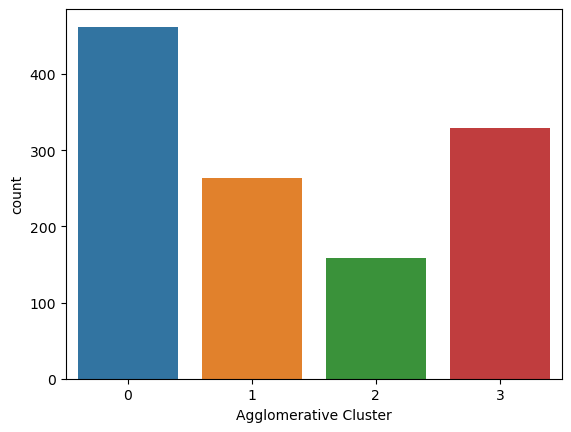

In [52]:
# Analyzing the characteristics of each Agglomerative cluster
Agglomerative_means = df4.groupby('Agglomerative Cluster').mean()
print(Agglomerative_means)



## countplot of each clusters
sns.countplot(x=df4['Agglomerative Cluster'])
plt.show()

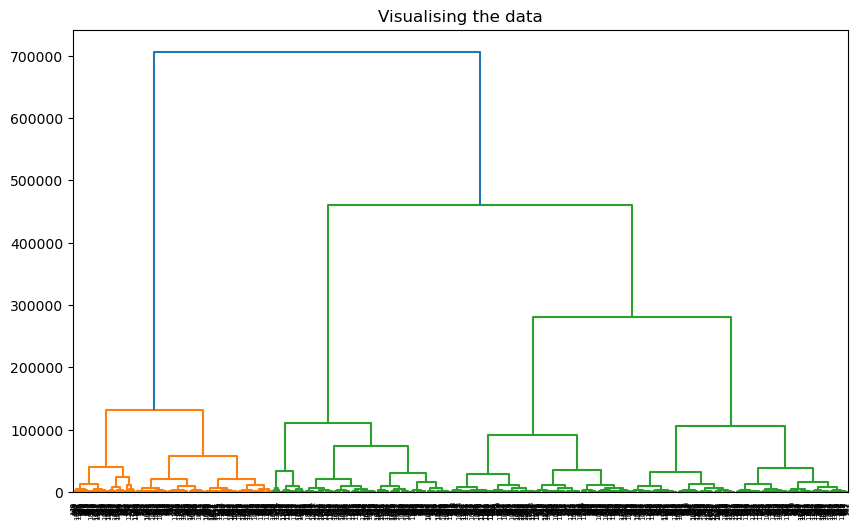

In [53]:
import scipy.cluster.hierarchy as shc


plt.figure(figsize =(10, 6))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df4, method ='ward')))

### Model Building for Agglomerative Clustering

In [54]:
X=pd.DataFrame(X_pca)
y=df4['Agglomerative Cluster']
y

1       1
2       2
3       0
4       1
5       3
       ..
2025    0
2027    3
2028    0
2030    3
2032    3
Name: Agglomerative Cluster, Length: 1212, dtype: int64

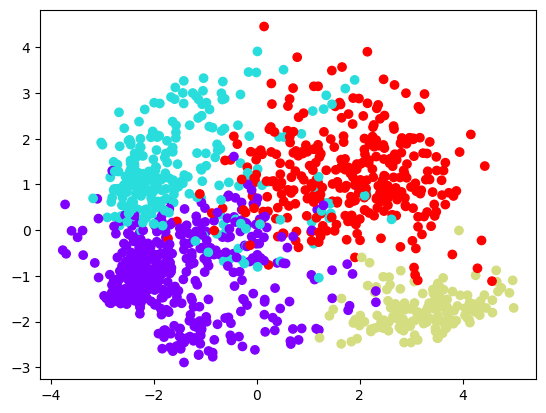

In [55]:
# Scatter plot for 1st two cols
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=agglomerative_cluster.labels_,cmap="rainbow")
plt.show()

In [56]:
## Doing train test split(pca data and cluster as target variable)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=100)
print(X_train.shape)
X_test.shape

(909, 2)


(303, 2)

In [57]:
## Logistic regression
from sklearn.linear_model import LogisticRegressionCV
Lr=LogisticRegressionCV()
Lr.fit(X_train,y_train)
y_train_pred = Lr.predict(X_train)
y_test_pred = Lr.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.8943894389438944
Test accuracy: 0.8778877887788779


In [58]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.8415841584158416


In [59]:
## Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = Rfc.predict(X_train)
y_test_pred = Rfc.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.8778877887788779


In [60]:
## SVM classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9031903190319032
Test accuracy: 0.8877887788778878


In [61]:
## Naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nv_model = GaussianNB()
nv_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = nv_model.predict(X_train)
y_test_pred = nv_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.88998899889989
Test accuracy: 0.8613861386138614


#### conclusion
Decision tree gives good accuracy in Agglomerative Clustering 

## DBSCAN Clustering

db_Cluster
 0    1005
 1     166
-1      41
Name: count, dtype: int64


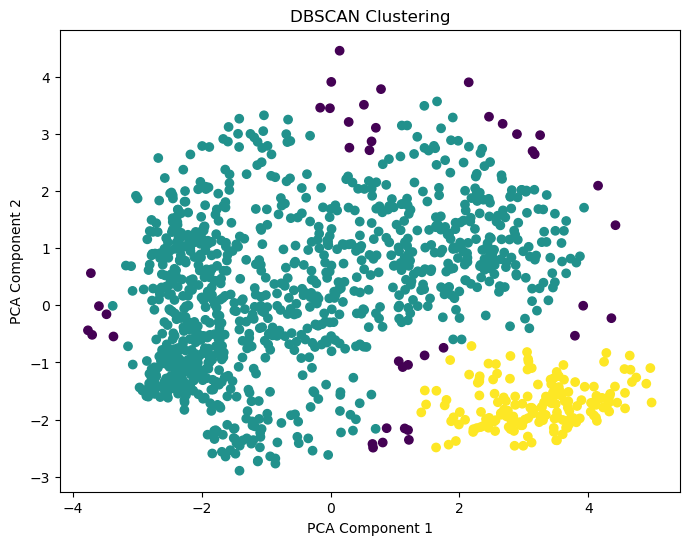

In [62]:
from sklearn.cluster import DBSCAN
df5=df2.copy()
df5.drop('Cluster',axis=1,inplace=True)


# Initializing DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10) # You may need to adjust these hyperparameters based on your data

# Performing clustering
clusters = dbscan.fit_predict(X_pca)

# Adding the cluster labels to the DataFrame
df5['db_Cluster'] = clusters

# Printing the count of data points in each cluster
print(df5['db_Cluster'].value_counts())

# Visualizing the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering')
plt.show()

In [63]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_pca)
kmeans_silhouette = silhouette_score(X_pca, kmeans_clusters)
print("K-means Silhouette Score:", kmeans_silhouette)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_pca)
dbscan_silhouette = silhouette_score(X_pca, dbscan_clusters)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_clusters = agg_cluster.fit_predict(X_pca)
agg_silhouette = silhouette_score(X_pca, agg_clusters)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette)


K-means Silhouette Score: 0.435109665103569
DBSCAN Silhouette Score: -0.2679715397043388
Agglomerative Clustering Silhouette Score: 0.3907384291031907


In [64]:
df5

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1             2               4  46344.0        1         1       38   
2             2               5  71613.0        0         0       26   
3             2               5  26646.0        1         0       26   
4             4               3  58293.0        1         0       94   
5             3               5  62513.0        0         1       16   
...         ...             ...      ...      ...       ...      ...   
2025          2               3  24434.0        2         0        9   
2027          3               4  44802.0        0         0       71   
2028          2               4  26816.0        0         0       50   
2030          2               3  61223.0        0         1       46   
2032          3               5  69245.0        0         1        8   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
5                     2                6                    4   
...                 ...              ...                  ...   
2025                  2                2                    1   
2027                  2                9                    4   
2028                  1                0                    0   
2030                  2                9                    3   
2032                  2                6                    5   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
5                    10                  6             0             0   
...                 ...                ...           ...           ...   
2025                  2                  7             0             0   
2027                 12                  8             0             0   
2028                  3                  4             0             0   
2030                  4                  5             0             0   
2032                 10                  3             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
1                0             0             0         0         0   
2                0             0             0         0         0   
3                0             0             0         0         0   
4                0             0             0         0         0   
5                0             0             0         0         0   
...            ...           ...           ...       ...       ...   
2025             0             0             0         0         0   
2027             0             0             0         0         0   
2028             0             0             0         0         0   
2030             0             0             0         0         0   
2032             0             0             0         0         0   

      total_amount_spent  Children  db_Cluster  
1                     27         2           0  
2                    776         0           1  
3                     53         1           0  
4                    422         1           0  
5                    716         1           0  
...                  ...       ...         ...  
2025                  50         2           0  
2027                1049         0           0  
2028                  22         0           0  
2030                1341         1           0  
2032                 843         1           0  

[1212 rows x 21 columns]

### Model Building for dbscan

In [65]:
X=pd.DataFrame(X_pca)
y=df5['db_Cluster']
y

1       0
2       1
3       0
4       0
5       0
       ..
2025    0
2027    0
2028    0
2030    0
2032    0
Name: db_Cluster, Length: 1212, dtype: int64

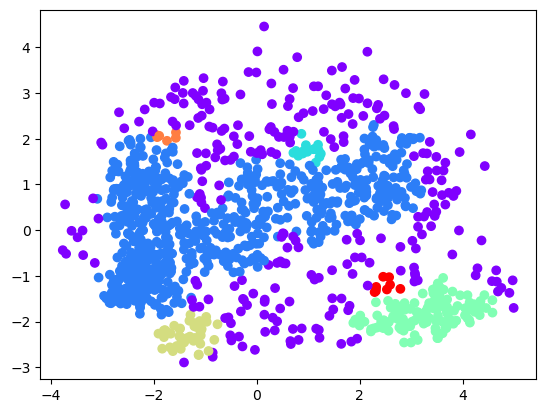

In [66]:
# Scatter plot for 1st two cols
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=dbscan.labels_,cmap="rainbow")
plt.show()

In [67]:
## Doing train test split(pca data and db scan cluster as target variable)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=100)
print(X_train.shape)
X_test.shape

(909, 2)


(303, 2)

In [68]:
## Logistic regression
from sklearn.linear_model import LogisticRegressionCV
Lr=LogisticRegressionCV()
Lr.fit(X_train,y_train)
y_train_pred = Lr.predict(X_train)
y_test_pred = Lr.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9647964796479648
Test accuracy: 0.9570957095709571


In [69]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.9735973597359736


In [70]:
## Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = Rfc.predict(X_train)
y_test_pred = Rfc.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.966996699669967


In [71]:
## SVM classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9757975797579758
Test accuracy: 0.9636963696369637


In [72]:
## Naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nv_model = GaussianNB()
nv_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = nv_model.predict(X_train)
y_test_pred = nv_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9592959295929593
Test accuracy: 0.9537953795379538


#### conclusion
Random Forest gives good accuracy in DBScan Clustering

## Finalized model

In [36]:
df_final=df2.copy()
df_final

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1             2               4  46344.0        1         1       38   
2             2               5  71613.0        0         0       26   
3             2               5  26646.0        1         0       26   
4             4               3  58293.0        1         0       94   
5             3               5  62513.0        0         1       16   
...         ...             ...      ...      ...       ...      ...   
2025          2               3  24434.0        2         0        9   
2027          3               4  44802.0        0         0       71   
2028          2               4  26816.0        0         0       50   
2030          2               3  61223.0        0         1       46   
2032          3               5  69245.0        0         1        8   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
5                     2                6                    4   
...                 ...              ...                  ...   
2025                  2                2                    1   
2027                  2                9                    4   
2028                  1                0                    0   
2030                  2                9                    3   
2032                  2                6                    5   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
5                    10                  6             0             0   
...                 ...                ...           ...           ...   
2025                  2                  7             0             0   
2027                 12                  8             0             0   
2028                  3                  4             0             0   
2030                  4                  5             0             0   
2032                 10                  3             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
1                0             0             0         0         0   
2                0             0             0         0         0   
3                0             0             0         0         0   
4                0             0             0         0         0   
5                0             0             0         0         0   
...            ...           ...           ...       ...       ...   
2025             0             0             0         0         0   
2027             0             0             0         0         0   
2028             0             0             0         0         0   
2030             0             0             0         0         0   
2032             0             0             0         0         0   

      total_amount_spent  Children  
1                     27         2  
2                    776         0  
3                     53         1  
4                    422         1  
5                    716         1  
...                  ...       ...  
2025                  50         2  
2027                1049         0  
2028                  22         0  
2030                1341         1  
2032                 843         1  

[1212 rows x 20 columns]

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc=StandardScaler()
final_df=sc.fit_transform(df_final)
#pca=PCA(n_components=2)
#final_df_pca=pca.fit_transform(final_df)
print(final_df)

[[-0.68331387  0.27811387 -0.10847865 ...  0.         -0.88048848
   1.55680275]
 [-0.68331387  1.20925753  1.23314856 ...  0.          0.61200956
  -1.52376041]
 [-0.68331387  1.20925753 -1.1543203  ...  0.         -0.82867947
   0.01652117]
 ...
 [-0.68331387  0.27811387 -1.14529435 ...  0.         -0.89045175
  -1.52376041]
 [-0.68331387 -0.6530298   0.68150399 ...  0.          1.73785922
   0.01652117]
 [ 0.46215834  1.20925753  1.10742244 ...  0.          0.74551739
   0.01652117]]


In [39]:
from sklearn.cluster import KMeans
# Applying KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4,init='k-means++', random_state=42)
clusters = kmeans.fit_predict(final_df)

# Adding the cluster labels to the DataFrame
df_final['Cluster'] = clusters

# Printing the count of data points in each cluster
print(df_final['Cluster'].value_counts())

Cluster
1    382
2    329
0    310
3    191
Name: count, dtype: int64


In [40]:
X=pd.DataFrame(final_df)
y=df_final['Cluster']
X

0         1         2         3         4         5         6   \
0    -0.683314  0.278114 -0.108479  1.032399  0.892141 -0.439656 -0.111267   
1    -0.683314  1.209258  1.233149 -0.880854 -1.001510 -0.860918 -0.860468   
2    -0.683314  1.209258 -1.154320  1.032399 -1.001510 -0.860918 -0.111267   
3     1.607631 -0.653030  0.525939  1.032399 -1.001510  1.526238  2.136334   
4     0.462158  1.209258  0.749995 -0.880854  0.892141 -1.211971 -0.111267   
...        ...       ...       ...       ...       ...       ...       ...   
1207 -0.683314 -0.653030 -1.271764  2.945652 -1.001510 -1.457708 -0.111267   
1208  0.462158  0.278114 -0.190349 -0.880854 -1.001510  0.718818 -0.111267   
1209 -0.683314  0.278114 -1.145294 -0.880854 -1.001510 -0.018393 -0.860468   
1210 -0.683314 -0.653030  0.681504 -0.880854  0.892141 -0.158814 -0.111267   
1211  0.462158  1.209258  1.107422 -0.880854  0.892141 -1.492813 -0.111267   

            7         8         9         10   11   12   13   14   15   16  \
0    -1.090774 -0.453468 -1.126601 -0.146730  0.0  0.0  0.0  0.0  0.0  0.0   
1     1.724598 -0.038360  1.386287 -0.601555  0.0  0.0  0.0  0.0  0.0  0.0   
2    -0.688578 -0.868575 -0.498379  0.308095  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.518010  0.376748  0.129843 -0.146730  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.920206  0.791856  1.386287  0.308095  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
1207 -0.688578 -0.453468 -1.126601  0.762921  0.0  0.0  0.0  0.0  0.0  0.0   
1208  2.126794  0.791856  2.014509  1.217746  0.0  0.0  0.0  0.0  0.0  0.0   
1209 -1.492970 -0.868575 -0.812490 -0.601555  0.0  0.0  0.0  0.0  0.0  0.0   
1210  2.126794  0.376748 -0.498379 -0.146730  0.0  0.0  0.0  0.0  0.0  0.0   
1211  0.920206  1.206964  1.386287 -1.056381  0.0  0.0  0.0  0.0  0.0  0.0   

       17        18        19  
0     0.0 -0.880488  1.556803  
1     0.0  0.612010 -1.523760  
2     0.0 -0.828679  0.016521  
3     0.0 -0.093390  0.016521  
4     0.0  0.492450  0.016521  
...   ...       ...       ...  
1207  0.0 -0.834657  1.556803  
1208  0.0  1.156004 -1.523760  
1209  0.0 -0.890452 -1.523760  
1210  0.0  1.737859  0.016521  
1211  0.0  0.745517  0.016521  

[1212 rows x 20 columns]

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=100)
final_model=RandomForestClassifier()
final_model.fit(X_train,y_train)
final_model.score(X_test,y_test)

0.9537953795379538

In [42]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("final_model.pkl","wb")
pickle.dump(final_model, pickle_out)
pickle_out.close()

In [43]:
df_final.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'total_amount_spent',
       'Children', 'Cluster'],
      dtype='object')

In [44]:
df_final.sample(1)

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
38          2               3  80011.0        0         1        3   

    NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
38                  2                8                    6   

    NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
38                  5                  4             0             0   

    AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
38             0             0             0         0         0   

    total_amount_spent  Children  Cluster  
38                1395         1        2